In [352]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon


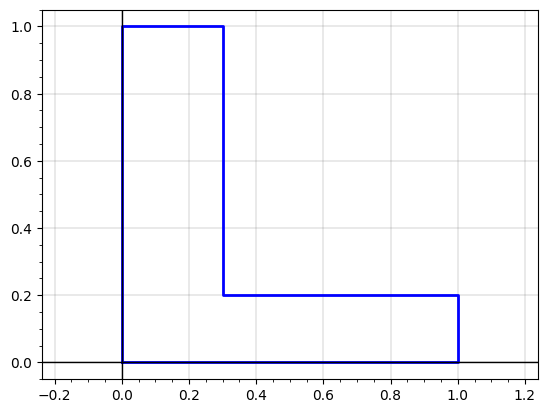

In [353]:
# Draw an L shaped region in R2 
def L_shape():
    X = np.array([[0, 0], [1, 0], [1, 0.2], [0.3, 0.2], [0.3, 1], [0, 1], [0, 0]])
    return X

# plot the polygon
def plot_polygon(X):
    # increase thickness of lines
    plt.rcParams['lines.linewidth'] = 2
    # plot the polygon
    plt.plot(X[:, 0], X[:, 1], 'b')

    plt.axis('equal')
    #show xy axes and some grid lines
    plt.axhline(0, color='black', lw=1)
    plt.axvline(0, color='black', lw=1)
    plt.grid(True)
    #make the grid dotted
    plt.minorticks_on()
    plt.grid(which='major', linestyle='-', linewidth='0.25', color='grey')

    return plt

region = L_shape()
poly = Polygon(region)
plt = plot_polygon(region)
plt.show()

In [354]:
n = 1000

# generate n random points in the unit square
X = np.random.rand(n, 2)

In [355]:
# create a mask to keep only the points inside the L shape

def create_mask(X, poly):
    mask = np.zeros(n, dtype=bool)
    for i in range(n):
        mask[i] = poly.contains(Point(X[i, :]))
    return mask

mask = create_mask(X, poly)

In [356]:
# plot the first k points in X 
def plot_points(polygon, X, k):
    inside_points = 0
    plt = plot_polygon(polygon)
    for i in range(k):
        plt.plot(X[i, 0], X[i, 1], 'r.' if mask[i] else 'k.',markersize=2)
        inside_points += mask[i]
    plt.show()

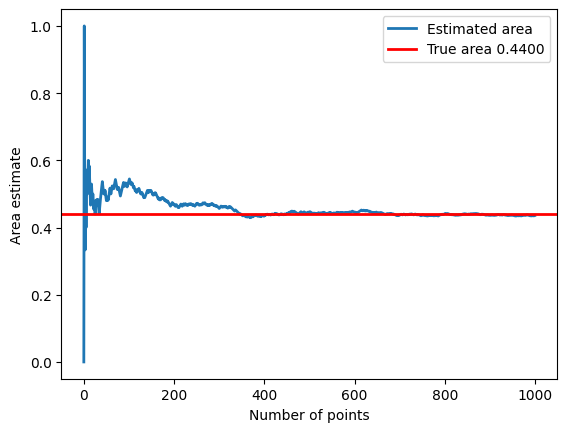

In [357]:

# find the area of the L shape
true_area = polygon.area

# estimate the area of the L shape using the first k points in X
def area_estimate(X, k):
    inside_points = 0
    for i in range(k):
      inside_points += mask[i]
    return inside_points/k


# plot the area estimate as a function of k and the true area
def plot_area_estimate(X, n, true_area):
    area = np.zeros(n)
    for i in range(1, n):
        area[i] = area_estimate(X, i)
    plt.plot(area, label='Estimated area')
    plt.axhline(true_area, color='r', label='True area {:.4f}'.format(true_area))
    plt.xlabel('Number of points')
    plt.ylabel('Area estimate')
    plt.legend()
    plt.show()

plot_area_estimate(X, n, true_area)



In [358]:
widgets.interact(plot_points, polygon=widgets.fixed(region), X=widgets.fixed(X), k=widgets.Play(min=1, max=n, step=10, value=1), continuous_update=True)

# widgets.interact(plot_points, polygon=widgets.fixed(region), X=widgets.fixed(X), k=widgets.IntSlider(min=1, max=n, step=10, value=1))

interactive(children=(Play(value=1, description='k', max=1000, min=1, step=10), Output()), _dom_classes=('widg…

<function __main__.plot_points(polygon, X, k)>